In [1]:
## importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Importing data
df=pd.read_csv(r"C:\Users\Dell i7\Documents\time series\AirPassengers.csv")
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
## we should rename the column names.
df.columns=['Date','Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## Visualize the Time Series

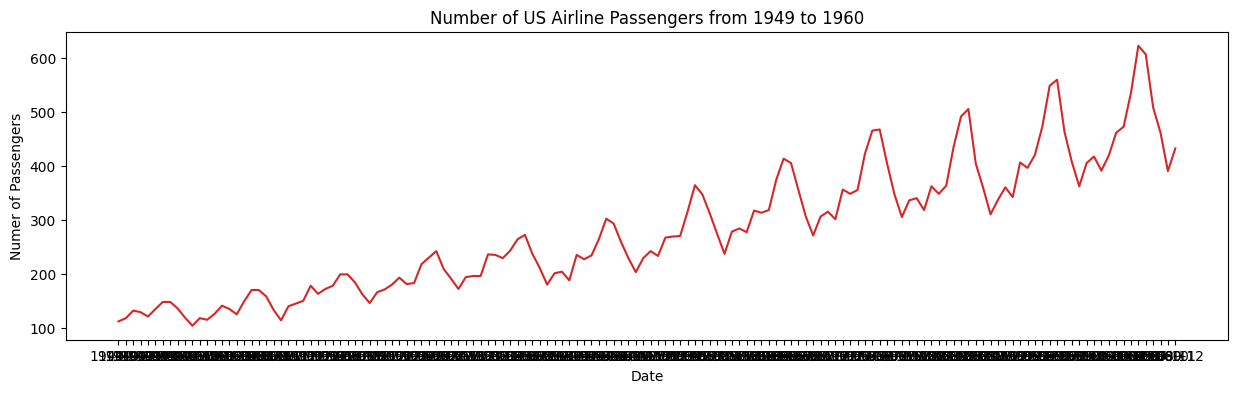

In [5]:
def plot_df(df,x,y,title="",xlabel='Date',ylabel='Numer of Passengers',dpi=100):
    plt.figure(figsize=(15,4),dpi=dpi)
    plt.plot(x,y,color='tab:red')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()
    
plot_df(df,x=df['Date'],y=df['Number of Passengers'],title='Number of US Airline Passengers from 1949 to 1960')    

Since all the values are positive, we can show this on both sides of the Y axis to emphasize the growth.

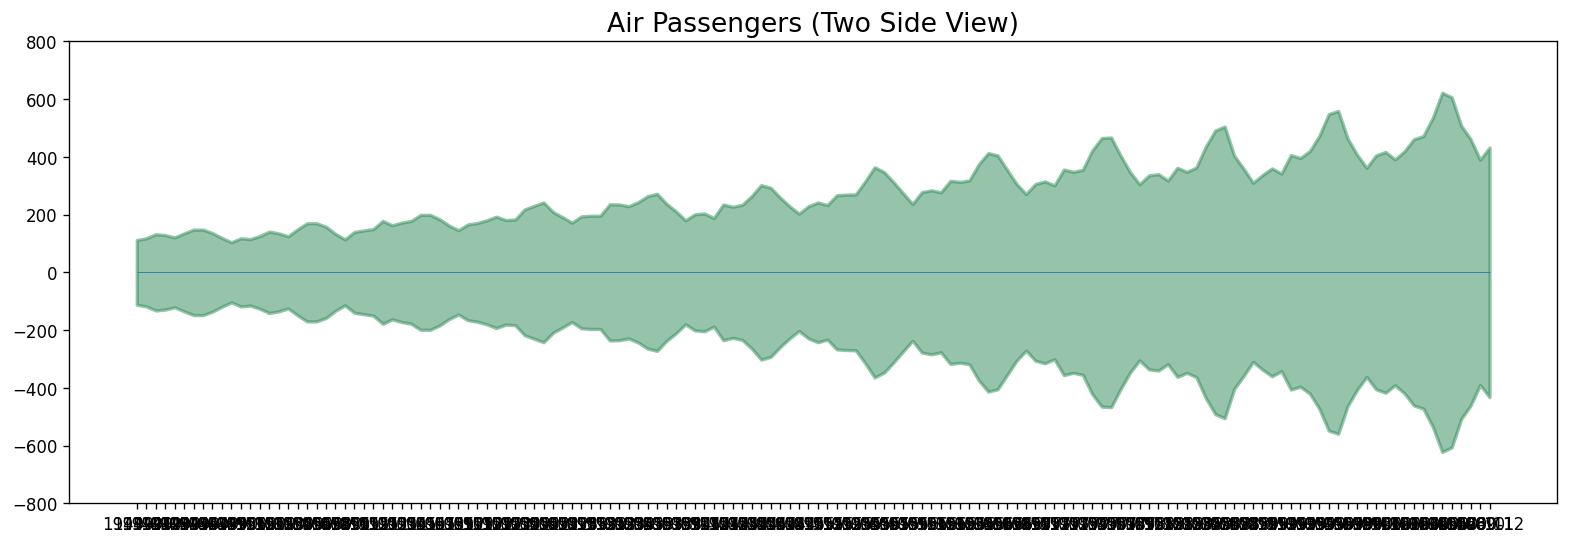

In [6]:
x = df['Date'].values
y1 = df['Number of Passengers'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=.5)
plt.show()

It can be seen that its a monthly time series and follows a certain repetitive pattern every year. So, we can plot each year as a separate line in the same plot. This let us compare the year wise patterns side-by-side.

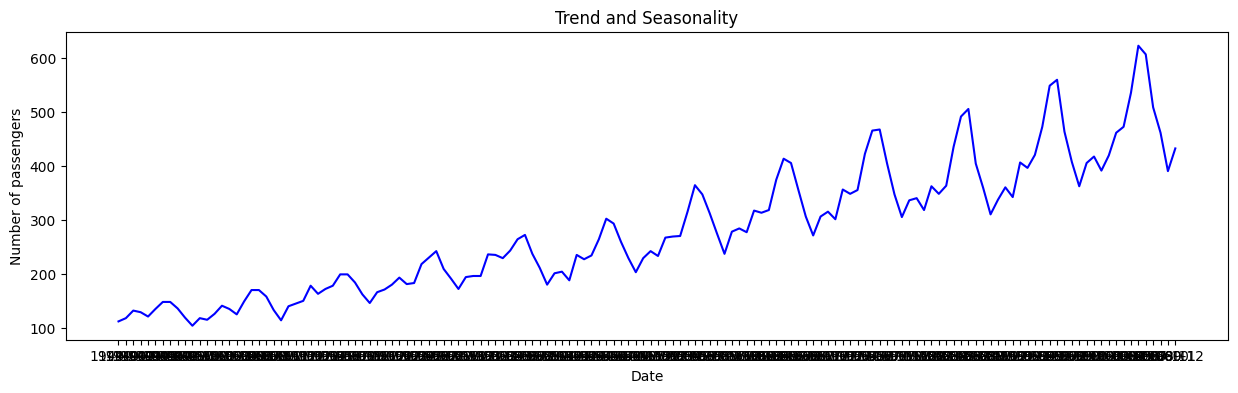

In [7]:
def plot_df(df,x,y,title="",xlabel='Date',ylabel='Number of passengers',dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x,y ,color='blue')
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.show()
plot_df(df,x=df['Date'],y=df['Number of Passengers'],title='Trend and Seasonality')    

In [8]:
!pip install statsmodels
!pip install python-dateutil


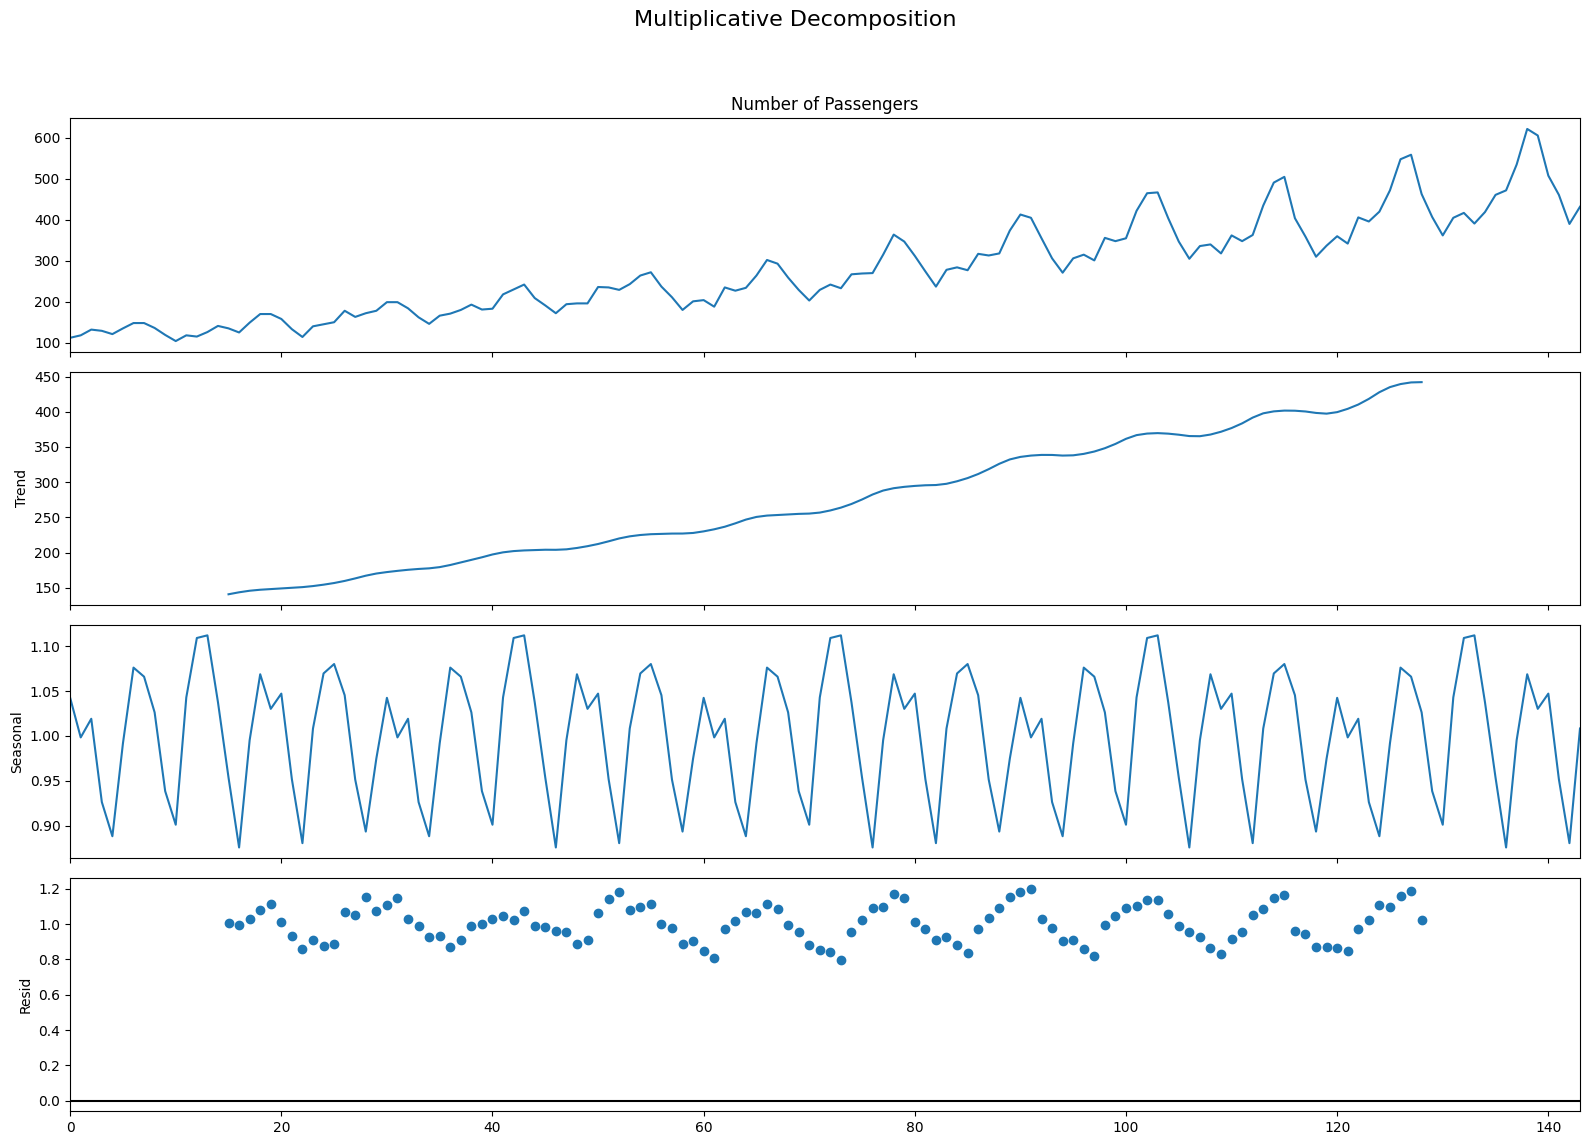

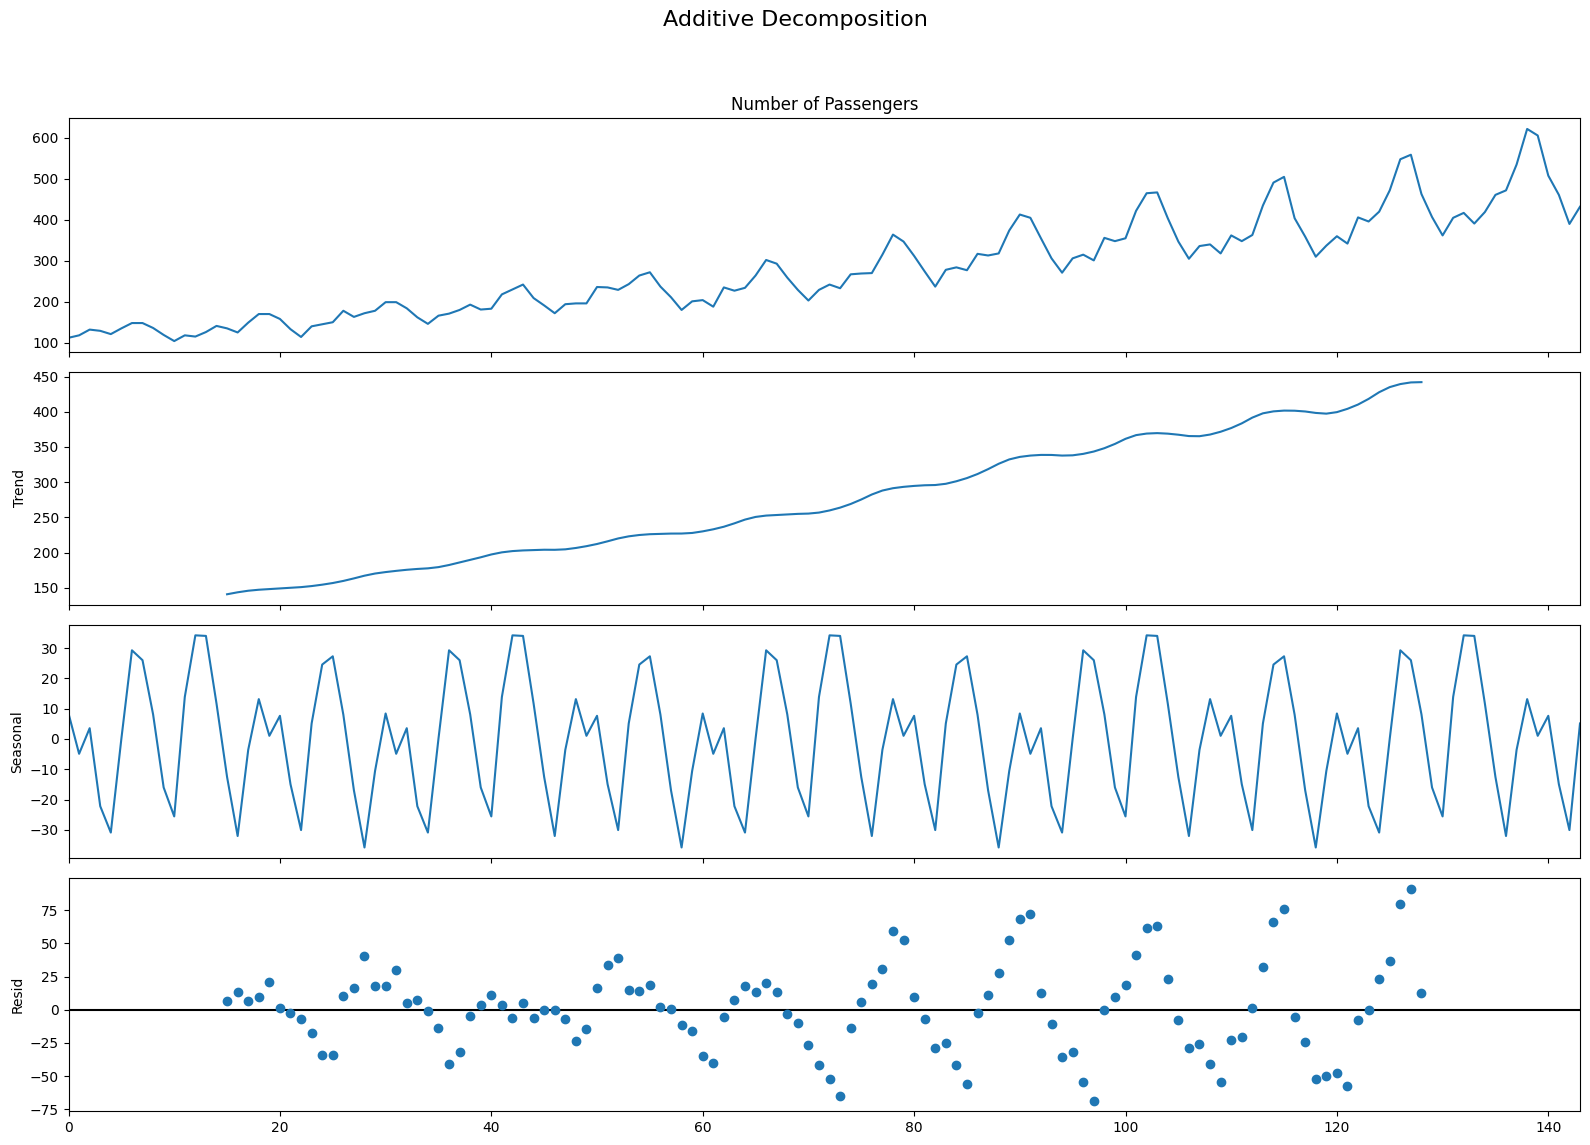

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Number of Passengers'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

<Axes: title={'center': 'Random White Noise'}>

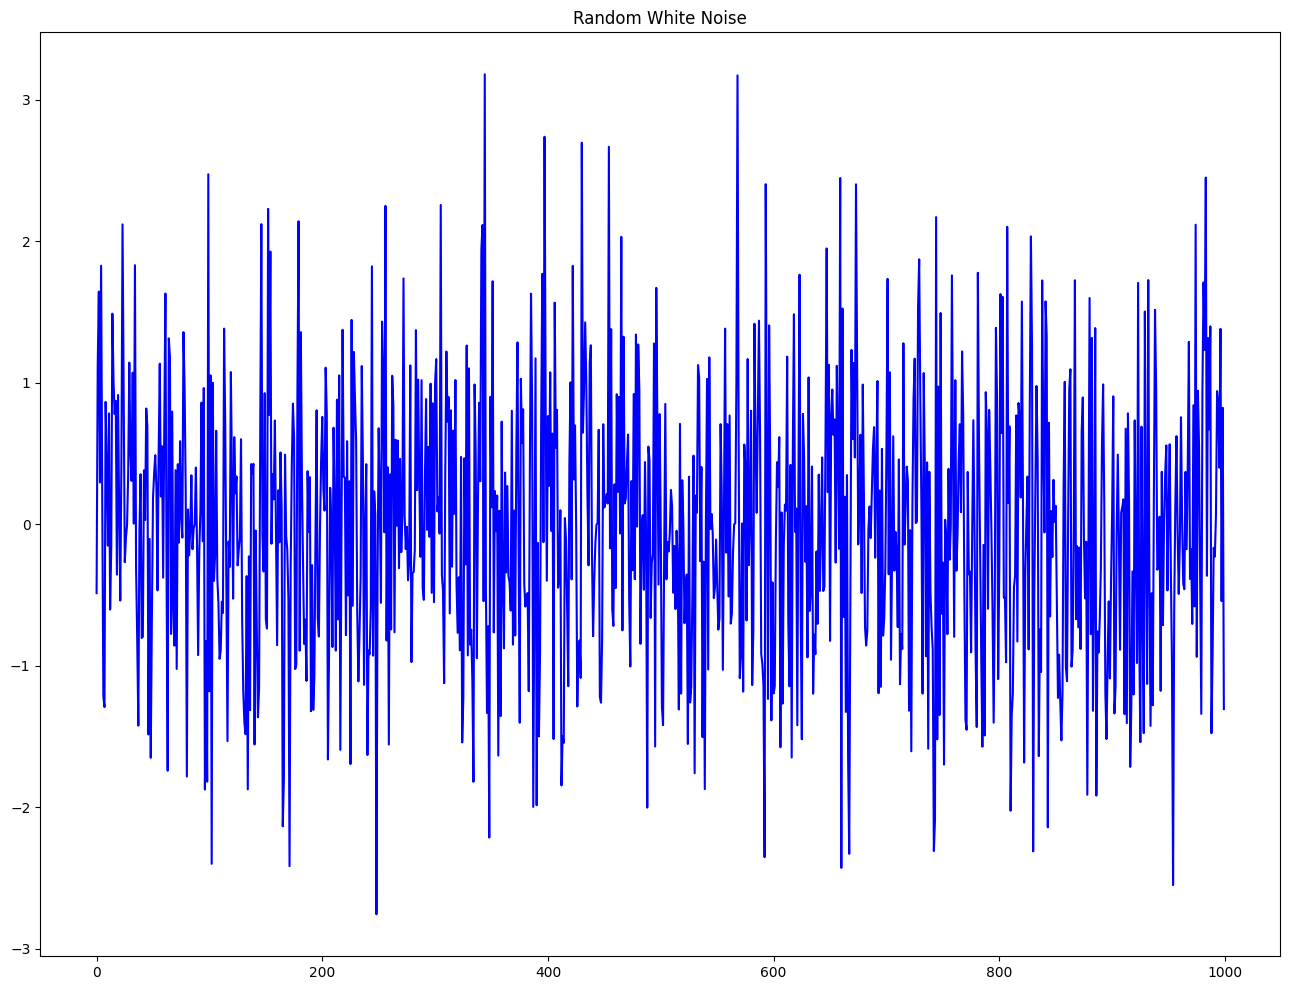

In [10]:
## diffierence between white noise and stationary series

rand_numbers=np.random.randn(1000)
pd.Series(rand_numbers).plot(title='Random White Noise',color='b')

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

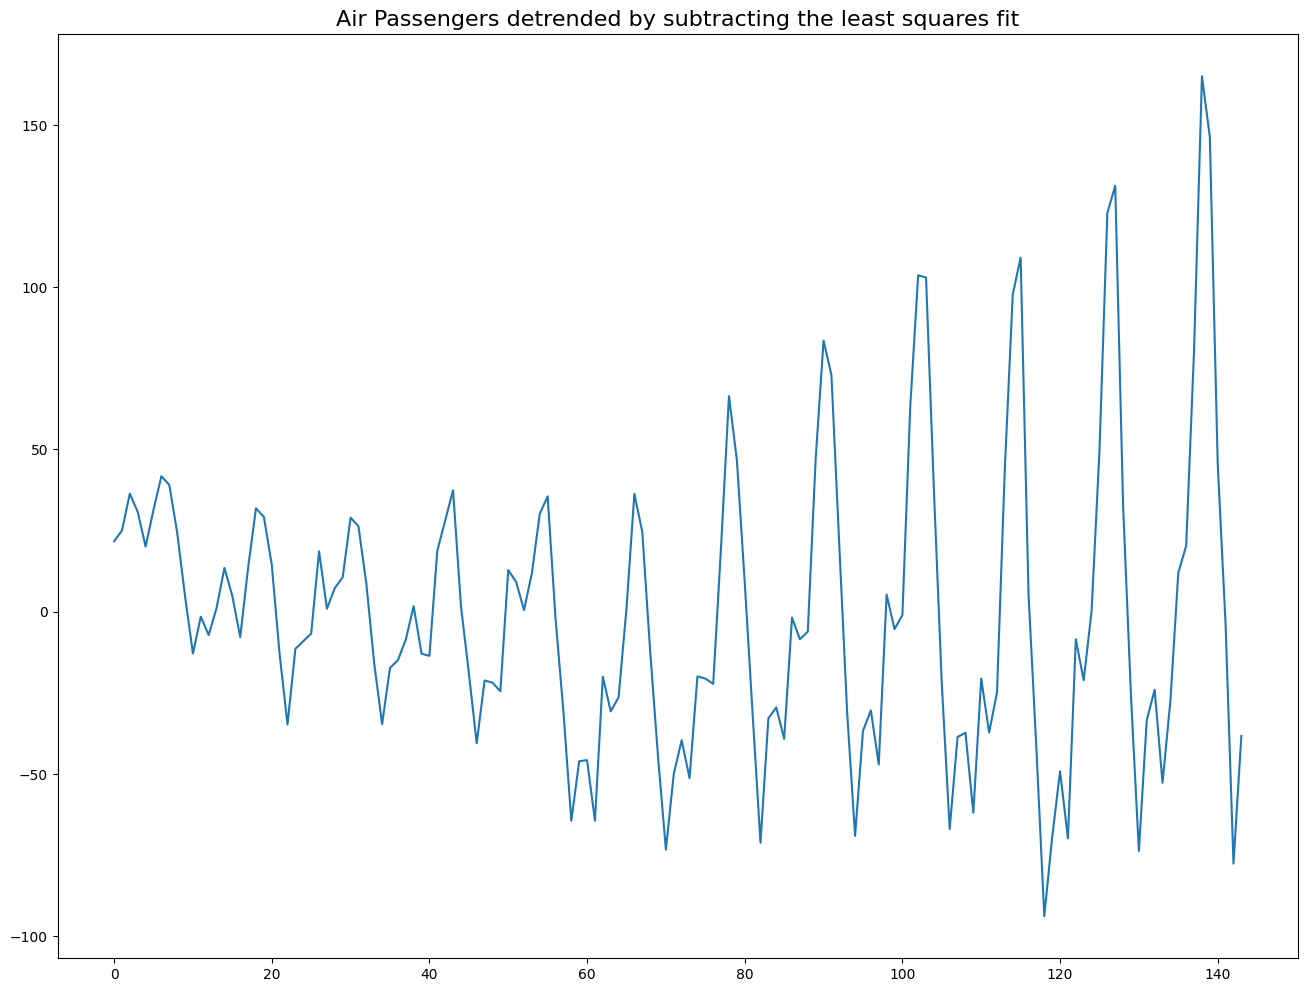

In [11]:
# using scipy: subtract the line of best fit
from scipy import signal
detrended=signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit',fontsize=16)

Text(0.5, 1.0, 'Air Passengers detrended by substracting the trend component')

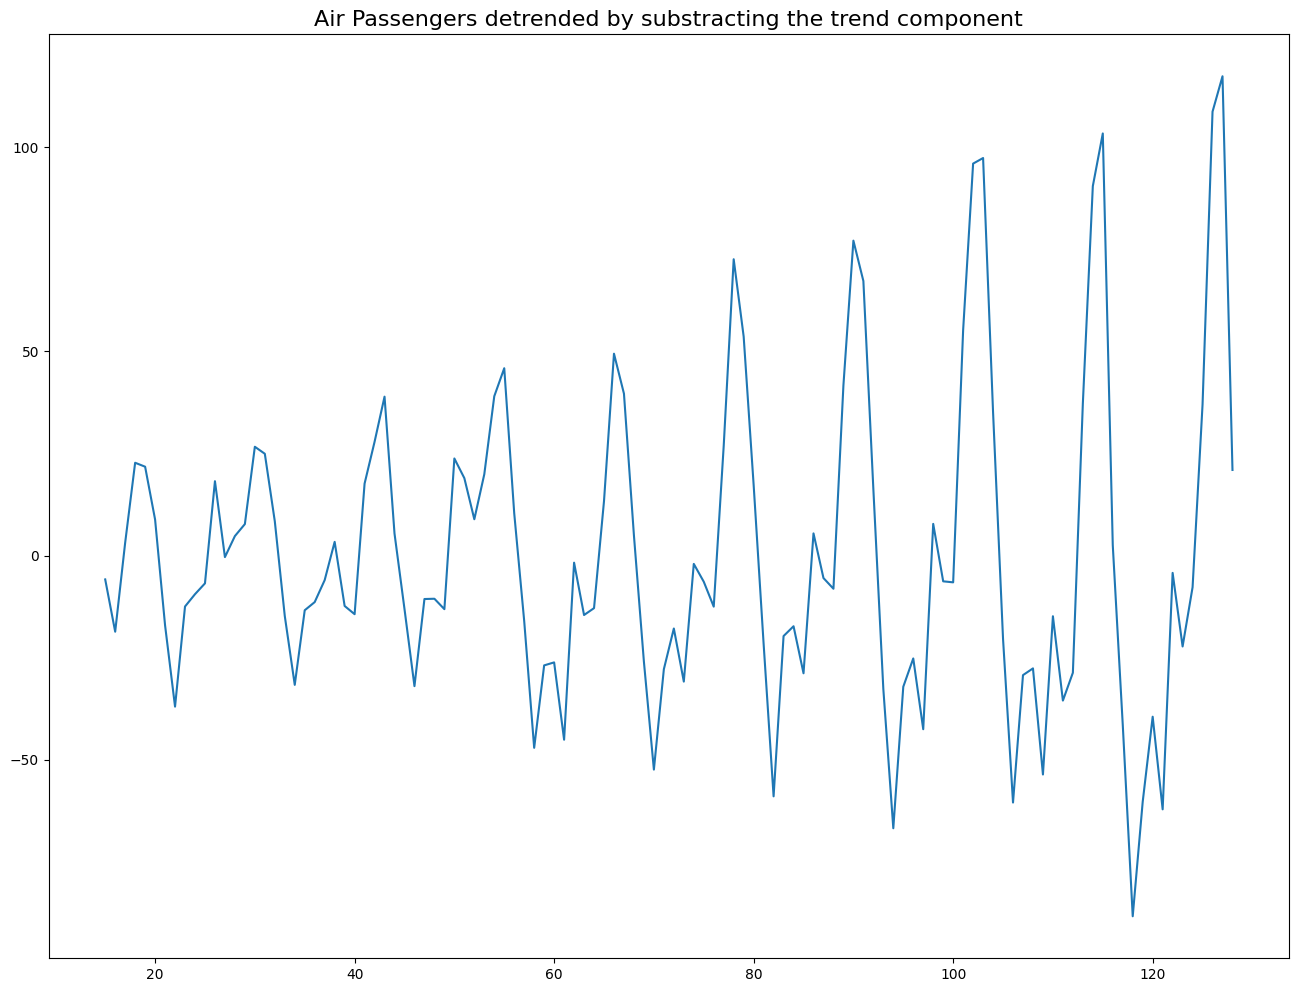

In [12]:
# using statsmodels:subtracting the trends component
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul=seasonal_decompose(df['Number of Passengers'],model='multiplicative',period=30)
detrended=df['Number of Passengers'].values - result_mul.trend
plt.plot(detrended)
plt.title('Air Passengers detrended by substracting the trend component',fontsize=16)

 Deseasonalize a Time Series

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

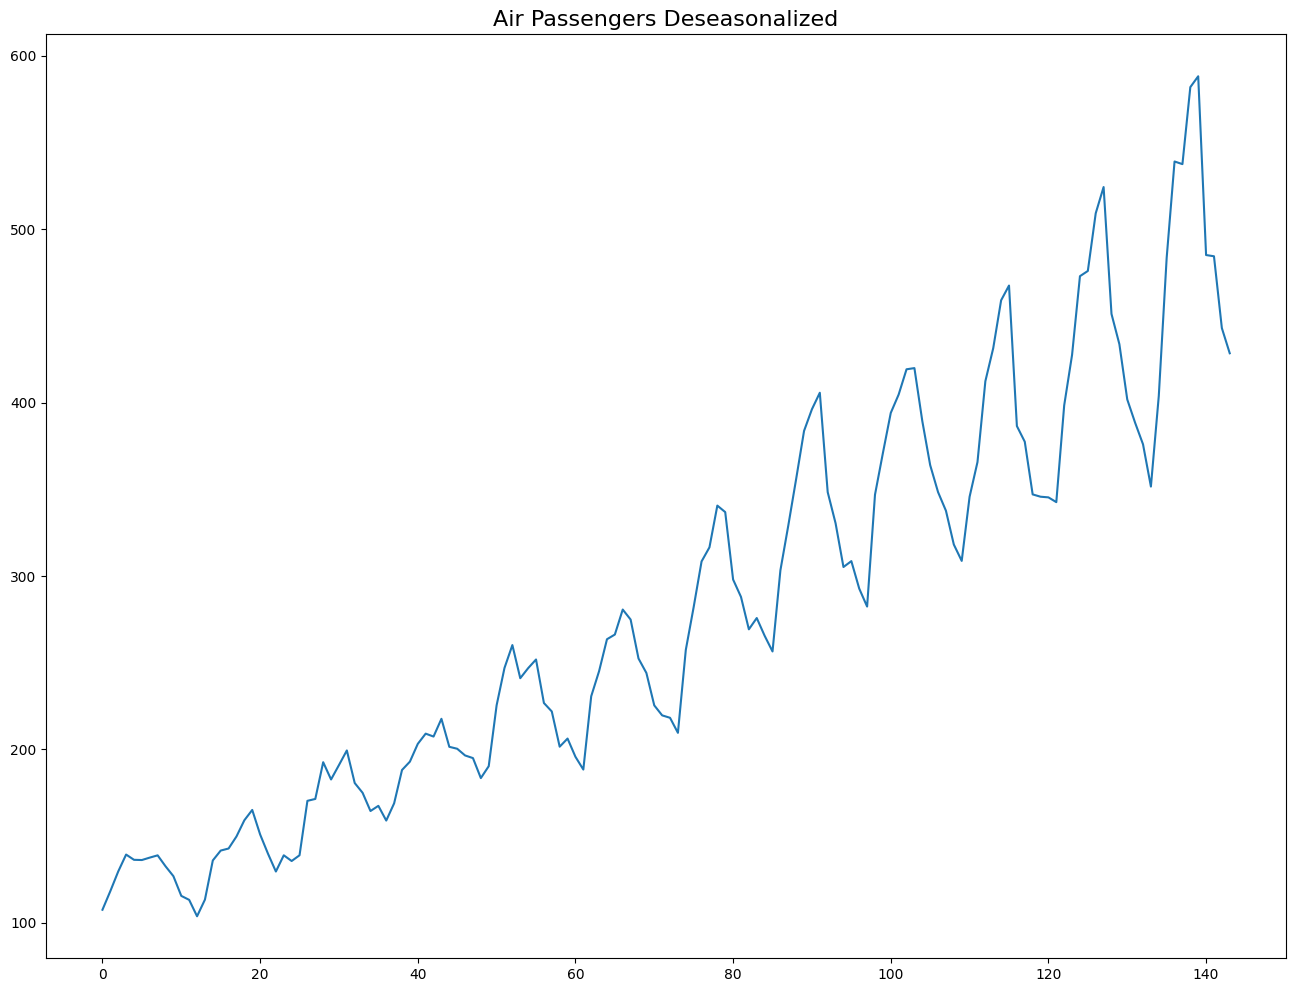

In [13]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mul = seasonal_decompose(df['Number of Passengers'], model='multiplicative', period=30)


# Deseasonalize
deseasonalized = df['Number of Passengers'].values / result_mul.seasonal


# Plot
plt.plot(deseasonalized)
plt.title('Air Passengers Deseasonalized', fontsize=16)
plt.plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

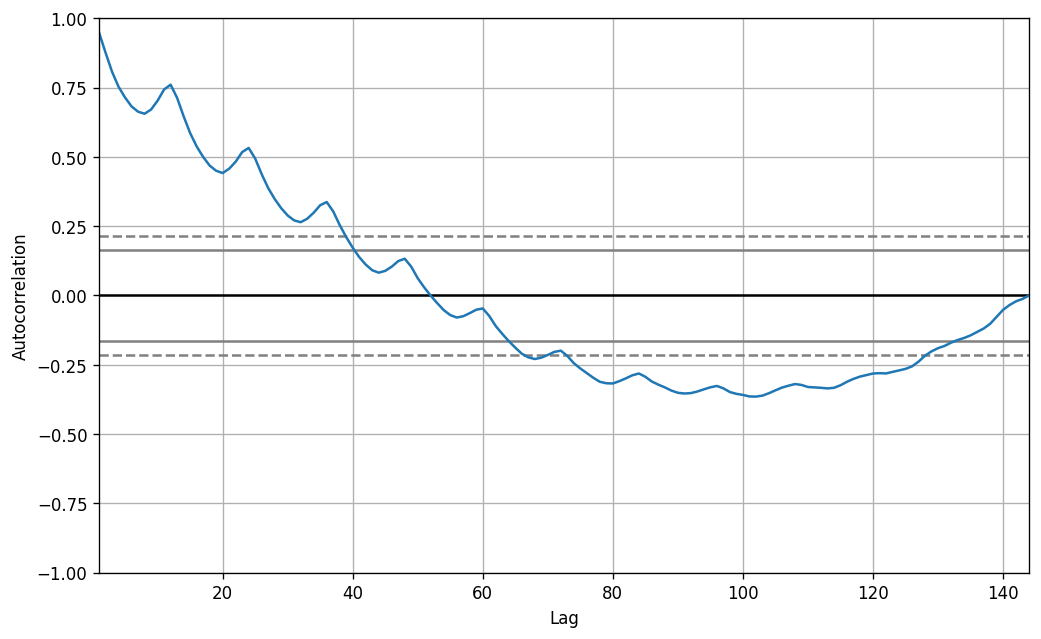

In [14]:
# Test for seasonality
from pandas.plotting import autocorrelation_plot

#draw plot
plt.rcParams.update({'figure.figsize':(10,6),'figure.dpi':120})
autocorrelation_plot(df['Number of Passengers'].tolist())

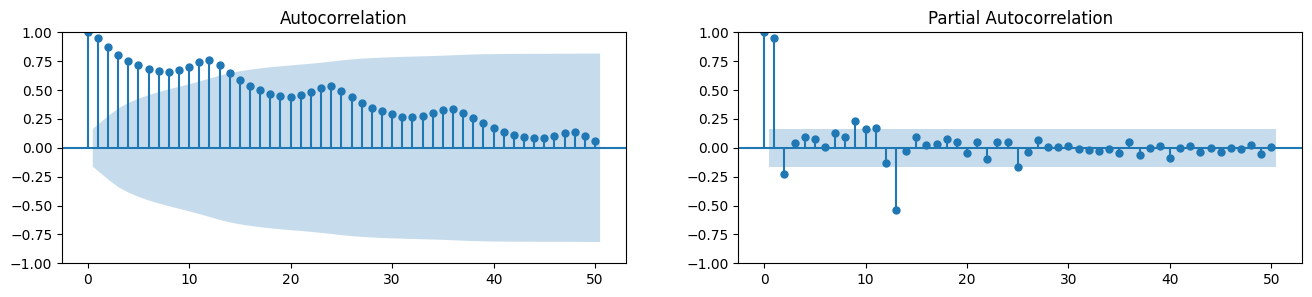

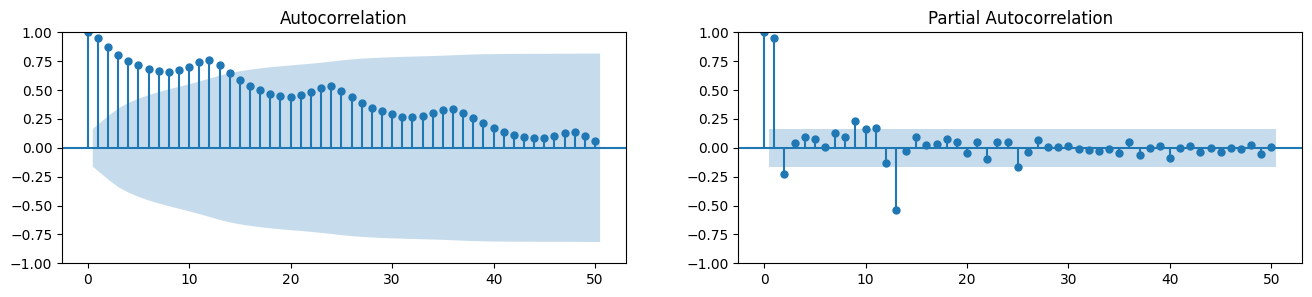

In [15]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# draw plot
fig,axes=plt.subplots(1,2,figsize=(16,3),dpi=100)
plot_acf(df['Number of Passengers'].tolist(),lags=50,ax=axes[0])
plot_pacf(df['Number of Passengers'].tolist(),lags=50,ax=axes[1])

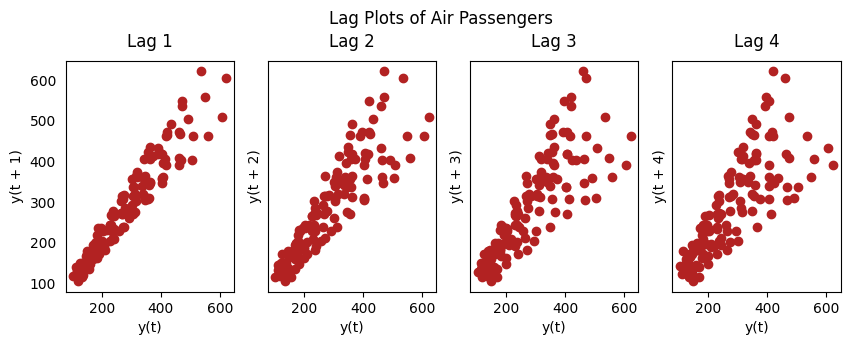

In [16]:
# lags plot
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Number of Passengers'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Air Passengers', y=1.05)    
plt.show()